Credits: Starter code provided by Udacity as part of their Introduction to Data Analysis course.

In [1]:
import numpy as np

## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(filename):    
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

In [4]:
daily_engagement[0]

{'acct': '0',
 'lessons_completed': '0.0',
 'num_courses_visited': '1.0',
 'projects_completed': '0.0',
 'total_minutes_visited': '11.6793745',
 'utc_date': '2015-01-09'}

In [5]:
project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Fixing Data Types

In [6]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [7]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [8]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Problems in the Data

In [9]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

In [10]:
print(daily_engagement[0]['account_key'])

0


Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [11]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def num_unique_students(table):
    s = set()
    for row in table:
        s.add(row['account_key'])
    return len(s)

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = num_unique_students(enrollments)

engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = num_unique_students(daily_engagement)

submission_num_rows = len(project_submissions)
submission_num_unique_students = num_unique_students(project_submissions)

print('enrollment_num_rows:', enrollment_num_rows)
print('enrollment_num_unique_students:', enrollment_num_unique_students)
print('engagement_num_rows:', engagement_num_rows)
print('engagement_num_unique_students:', engagement_num_unique_students)
print('submission_num_rows:', submission_num_rows)
print('submission_num_unique_students:', submission_num_unique_students)

enrollment_num_rows: 1640
enrollment_num_unique_students: 1302
engagement_num_rows: 136240
engagement_num_unique_students: 1237
submission_num_rows: 3642
submission_num_unique_students: 743


## Missing Engagement Records

In [12]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

def unique_students(table):
    s = set()
    for row in table:
        s.add(row['account_key'])
    return s

unique_engagement_students = unique_students(daily_engagement)
unique_enrolled_students = unique_students(enrollments)

for enrollment in enrollments:
    unique_enrolled_student = enrollment['account_key']
    if unique_enrolled_student not in unique_engagement_students:
        print(enrollment)
        break # use if only want to print one)

{'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'is_udacity': False, 'account_key': '1219', 'days_to_cancel': 0, 'status': 'canceled'}


## Checking for More Problem Records

In [13]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_problem_students = 0

for enrollment in enrollments:
    unique_enrolled_student = enrollment['account_key']
    if unique_enrolled_student not in unique_engagement_students:
        if enrollment['join_date'] != enrollment['cancel_date']:
            print(enrollment)
            num_problem_students += 1
            # use if only want to print one)

print(num_problem_students)

# Apparently udacity=True means they are test accounts.

{'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'is_udacity': True, 'account_key': '1304', 'days_to_cancel': 59, 'status': 'canceled'}
{'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_udacity': True, 'account_key': '1304', 'days_to_cancel': 99, 'status': 'canceled'}
{'cancel_date': None, 'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'is_udacity': True, 'account_key': '1101', 'days_to_cancel': None, 'status': 'current'}
3


In [14]:
for enrollment in enrollments:
    if enrollment['account_key'] == '1101':
        print(enrollment)

{'cancel_date': None, 'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'is_udacity': True, 'account_key': '1101', 'days_to_cancel': None, 'status': 'current'}


## Tracking Down the Remaining Problems

In [15]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [16]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [17]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


In [ ]:
# Add new column visit on this day = 0 or 1
for engagement_record in non_udacity_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['visited_on_day'] = 1
    else:
        engagement_record['visited_on_day'] = 0

## Refining the Question

In [18]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['is_canceled'] == False or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        date_enrolled = enrollment['join_date']
        
        if account_key not in paid_students or date_enrolled > paid_students[account_key]:
            paid_students[account_key] = date_enrolled
print(len(paid_students))

995


## Getting Data from First Week

In [19]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [32]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for daily_engagement in non_udacity_engagement:
    account_key = daily_engagement['account_key']
    if account_key in paid_students:
        if within_one_week(paid_students[account_key], daily_engagement['utc_date']) == True:
            paid_engagement_in_first_week.append(daily_engagement)
            
print(len(paid_engagement_in_first_week))

6919


In [60]:
def remove_free_trial(data):
    s=[]
    for datapoint in data:
        if datapoint['account_key'] in paid_students:
            s.append(datapoint)
    return s

paid_enrollments = remove_free_trial(non_udacity_enrollments)
paid_engagements = remove_free_trial(non_udacity_engagement)
paid_submissions = remove_free_trial(non_udacity_submissions)


print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1622
135656
3634
1293
134549
3618


## Exploring Student Engagement

In [34]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [35]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [36]:
total_minutes = total_minutes_by_account.values()

total_minutes_list = []
for i in total_minutes:
    total_minutes_list.append(i)

total_minutes = total_minutes_list

In [37]:
# Summarize the data about minutes spent in the classroom
print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [26]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

In [27]:
max_minutes = 0
for account_key, total_minutes_for_student in total_minutes_by_account.items():
    if total_minutes_for_student > max_minutes:
        student_with_max_minutes = account_key
        max_minutes = total_minutes_for_student

In [28]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

{'lessons_completed': 4, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'total_minutes_visited': 850.519339666, 'projects_completed': 0, 'num_courses_visited': 4, 'account_key': '163'}
{'lessons_completed': 6, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'total_minutes_visited': 872.633923334, 'projects_completed': 0, 'num_courses_visited': 6, 'account_key': '163'}
{'lessons_completed': 6, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'total_minutes_visited': 777.018903666, 'projects_completed': 0, 'num_courses_visited': 2, 'account_key': '163'}
{'lessons_completed': 2, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'total_minutes_visited': 294.568774, 'projects_completed': 0, 'num_courses_visited': 1, 'account_key': '163'}
{'lessons_completed': 1, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'total_minutes_visited': 471.2139785, 'projects_completed': 0, 'num_courses_visited': 3, 'account_key': '163'}
{'lessons_completed': 1, 'utc_date': datetime.datetime(2015, 7, 14

## Lessons Completed in First Week

In [38]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,
                                   'account_key')

total_lessons_by_account = {}
def sum_grouped_items(source_dictionary, field_name):
    summed_data = {}
    for key, data_points in source_dictionary.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_lessons_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

"""
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
            total_lessons += engagement_record['lessons_completed']
    total_lessons_by_account[account_key] = total_lessons    
"""
from collections import defaultdict
    
    
def convert_dict_values_to_list(dictionary):
    new_list = []
    for datapoint in dictionary.values():
           new_list.append(datapoint)
    return new_list

total_lessons_list = convert_dict_values_to_list(total_lessons_by_account)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


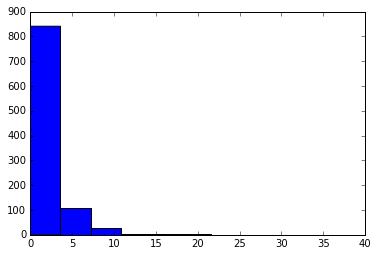

In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))
    plt.hist(data)
    
describe_data(total_lessons_list)

## Number of Visits in First Week

In [31]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [43]:
total_visits_by_account = sum_grouped_items(engagement_by_account, 'visited_on_day')
total_visits_by_account_list = convert_dict_values_to_list(total_visits_by_account)
describe_data(total_visits_by_account_list)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [62]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

passing_students = []
for submission in paid_submissions:
    assigned_rating = submission['assigned_rating']
    lesson_key = submission['lesson_key']
    account_key = submission['account_key']
    if (assigned_rating == 'PASSED' or assigned_rating == 'DISTINCTION') and lesson_key in subway_project_lesson_keys:
        passing_students.append(account_key)

print(len(passing_students))

652


In [57]:
passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if account_key in passing_students:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [67]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

passing_engagement_by_account = group_data(passing_engagement,
                                   'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,
                                   'account_key')
print('Number of days students visited the classroom in the first week')
print('Passing students:')
total_visits_by_account_passing = sum_grouped_items(passing_engagement_by_account, 'visited_on_day')
total_visits_by_account_passing_list = convert_dict_values_to_list(total_visits_by_account_passing)
describe_data(total_visits_by_account_passing_list)
print('Non-passing students:')
total_visits_by_account_non_passing = sum_grouped_items(non_passing_engagement_by_account, 'visited_on_day')
total_visits_by_account_non_passing_list = convert_dict_values_to_list(total_visits_by_account_non_passing)
describe_data(total_visits_by_account_non_passing_list)

Number of days students visited the classroom in the first week
Passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


In [68]:
print('Number of lessons students completed in the first week')
print('Passing students:')
total_lessons_by_account_passing = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
total_lessons_by_account_passing_list = convert_dict_values_to_list(total_lessons_by_account_passing)
describe_data(total_lessons_by_account_passing_list)
print('Non-passing students:')
total_lessons_by_account_non_passing = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
total_lessons_by_account_non_passing_list = convert_dict_values_to_list(total_lessons_by_account_non_passing)
describe_data(total_lessons_by_account_non_passing_list)

Number of lessons students completed in the first week
Passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [69]:
print('Number of minutes students spent in the classroom in the first week')
print('Passing students:')
total_minutes_by_account_passing = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
total_minutes_by_account_passing_list = convert_dict_values_to_list(total_minutes_by_account_passing)
describe_data(total_minutes_by_account_passing_list)
print('Non-passing students:')
total_minutes_by_account_non_passing = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
total_minutes_by_account_non_passing_list = convert_dict_values_to_list(total_minutes_by_account_non_passing)
describe_data(total_minutes_by_account_non_passing_list)

Number of minutes students spent in the classroom in the first week
Passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


## Making Histograms

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

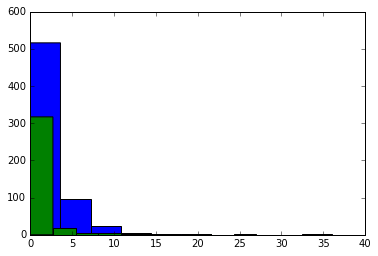

In [73]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(total_lessons_by_account_passing_list)
plt.hist(total_lessons_by_account_non_passing_list)

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

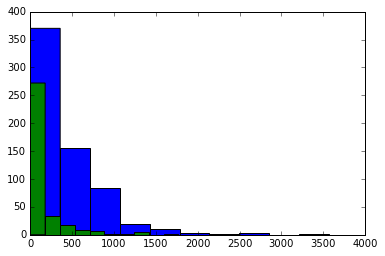

In [74]:
plt.hist(total_minutes_by_account_passing_list)
plt.hist(total_minutes_by_account_non_passing_list)

(array([ 97.,  90.,  56.,  41.,  15.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

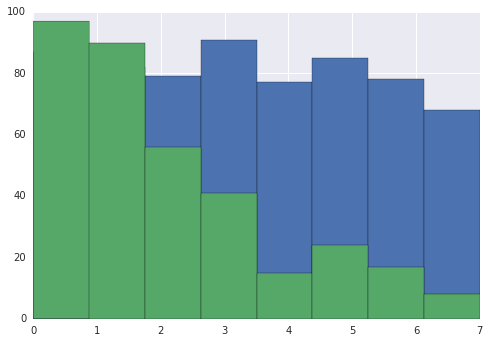

In [89]:
plt.hist(total_visits_by_account_passing_list, bins = 8)
plt.hist(total_visits_by_account_non_passing_list, bins = 8)

(array([ 87.,  82.,  79.,  91.,  77.,  85.,  78.,  68.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

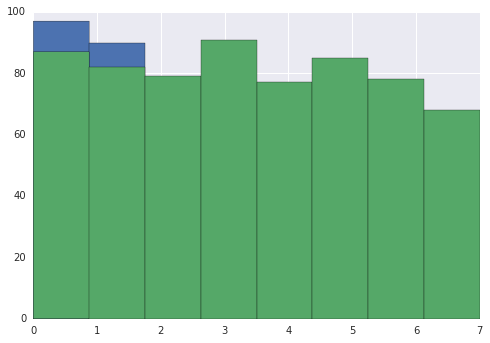

In [90]:
plt.hist(total_visits_by_account_non_passing_list, bins = 8)
plt.hist(total_visits_by_account_passing_list, bins = 8)

# Add new column visit on this day = 0 or 1
for engagement_record in non_udacity_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['visited_on_day'] = 1
    else:
        engagement_record['visited_on_day'] = 0

## Improving Plots and Sharing Findings

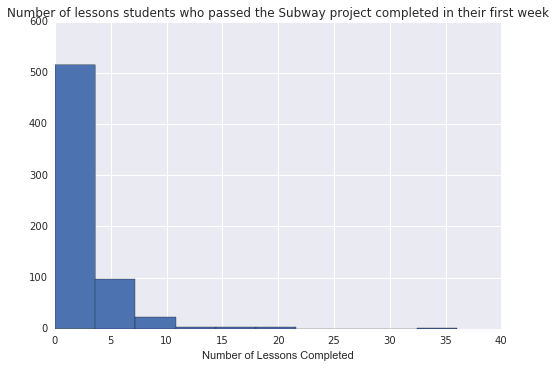

In [88]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(total_lessons_by_account_passing_list)
plt.title("Number of lessons students who passed the Subway project completed in their first week")
plt.xlabel("Number of Lessons Completed")